In [0]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import Normalizer


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving bangalore-cas-alerts.csv to bangalore-cas-alerts.csv
User uploaded file "bangalore-cas-alerts.csv" with length 22720347 bytes


In [3]:
datafile = pd.read_csv('bangalore-cas-alerts.csv', header='infer', sep=',', error_bad_lines=False, warn_bad_lines = False)
datafile.head()

,deviceCode_deviceCode,deviceCode_location_latitude,deviceCode_location_longitude,deviceCode_location_wardName,deviceCode_pyld_alarmType,deviceCode_pyld_speed,deviceCode_time_recordedTime_$date
0,864504031502210,12.984595,77.744087,Kadugodi,PCW,32,2018-02-01T01:48:59.000Z
1,864504031502210,12.984595,77.744087,Kadugodi,PCW,32,2018-02-01T01:48:59.000Z
2,864504031502210,12.987233,77.741119,Garudachar Playa,FCW,41,2018-02-01T01:50:00.000Z
3,864504031502210,12.987233,77.741119,Garudachar Playa,FCW,41,2018-02-01T01:50:00.000Z
4,864504031502210,12.987503,77.740051,Hudi,Overspeed,37,2018-02-01T01:50:11.000Z


In [0]:
gpsdata = datafile[['deviceCode_location_latitude','deviceCode_location_longitude']]
gpsdata.head()
gpsdataarray = gpsdata.values

In [5]:
print(gpsdataarray)

[[12.9845953  77.74408722]
 [12.9845953  77.74408722]
 [12.98723316 77.74111938]
 ...
 [12.96939564 77.74988556]
 [12.974123   77.74684143]
 [12.97548008 77.74412537]]


Number of clusters: 36


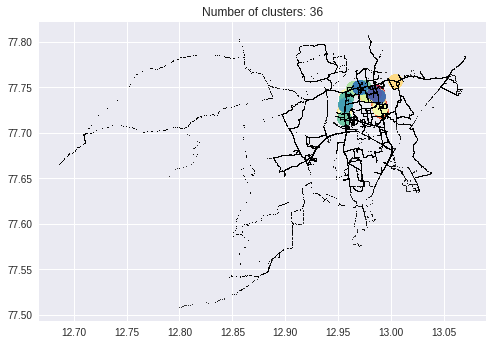

In [7]:
db = DBSCAN(eps=0.0001, min_samples=200).fit(gpsdataarray)
samples_initial = np.zeros_like(db.labels_, dtype=bool)
samples_initial[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Number of clusters: %d' % n_clusters_)
import matplotlib.pyplot as plt

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = gpsdataarray[class_member_mask & samples_initial]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = gpsdataarray[class_member_mask & ~samples_initial]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=1)

plt.title('Number of clusters: %d' % n_clusters_)
plt.show()

In [8]:
f = np.column_stack((gpsdataarray,labels))
LabelDF= pd.DataFrame(data=f, columns=['lon','lat','lab'])
EachLabelPrint = LabelDF.groupby('lab',as_index=False).first()
pd.set_option('display.max_rows', 500)
print(EachLabelPrint.head(40)[1:])

     lab        lon        lat
1    0.0  12.978786  77.742203
2    1.0  12.975768  77.742432
3    2.0  12.985925  77.744621
4    3.0  12.987546  77.740494
5    4.0  12.987633  77.735977
6    5.0  12.988061  77.732338
7    6.0  12.988720  77.728699
8    7.0  12.990313  77.723686
9    8.0  12.989051  77.727257
10   9.0  12.983611  77.743828
11  10.0  12.988010  77.733452
12  11.0  12.987665  77.737122
13  12.0  12.987523  77.736702
14  13.0  12.976376  77.741486
15  14.0  13.003273  77.757149
16  15.0  12.955878  77.723160
17  16.0  12.956163  77.730621
18  17.0  12.956956  77.740120
19  18.0  12.955770  77.720749
20  19.0  12.989065  77.726936
21  20.0  12.988876  77.727745
22  21.0  12.987380  77.741058
23  22.0  12.976850  77.741714
24  23.0  12.972576  77.749840
25  24.0  12.984163  77.743942
26  25.0  12.964371  77.748642
27  26.0  12.970830  77.750069
28  27.0  12.974451  77.750526
29  28.0  12.955745  77.716087
30  29.0  12.956965  77.738487
31  30.0  12.956148  77.731323
32  31.0